In [1]:
#load libraries 
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import matplotlib.colors as mcolors


In [2]:
#load the database to a dataframe
df = pd.read_csv('../data/lanternworlddata.tsv', sep='\t')

In [3]:
#this cell normalizes the entries for the countries (in Dutch)

df = df.replace('Engeland', 'Groot-Brittanië')
df = df.replace('Turkijke', 'Turkije')
df = df.replace('Bosnië-Herzegovina', 'Bosnië en Herzegovina')
df = df.replace('Bolivië', 'Bolivia')
df = df.replace('belgië', 'België')
df = df.replace('Engeland', 'Groot-Brittanië')
df = df.replace('Ijsland', 'IJsland')
df = df.replace('Venetië', 'Italië')
df = df.replace('Italë', 'Italië')
df = df.replace('Italïe','Italië')
df = df.replace('Italïe', 'Italië')
df = df.replace('Italiê', 'Italië')
df = df.replace('Japan Korea', 'Japan, Korea')
df = df.replace('Java', 'Indonesië')
df = df.replace('Luxenburg', 'Luxemburg')
df = df.replace('Mantsjoerije en Canada', 'China, Canada')
df = df.replace('Mongolie', 'Mongolië')
df = df.replace('Wenen', 'Oostenrijk')
df = df.replace('Oostenrijk-Hongarije', 'Oostenrijk, Hongarije')
df = df.replace('Persië', 'Perzië')
df = df.replace('Spitsberg', 'Spitsbergen')
df = df.replace('Tjecho-Slowakijke', 'Tsjecho-Slowakije')
df = df.replace('Tjecho-Slowakije', 'Tsjecho-Slowakije')
df = df.replace('Tunisië', 'Tunesië')
df = df.replace('Turkijke', 'Turkije')
df = df.replace('Zwitersland', 'Zwitserland')
df = df.replace('frankrijk', 'Frankrijk')
df = df.replace('Argentiniê', 'Argentinië')
df = df.replace('Siam', 'Thailand')
df = df.replace('Siam', 'Thailand')
df = df.replace('het Heilige Land', 'Het Heilige land')

In [4]:
# Dictionary to map certain terms to the desired term
country_mapping = {
    'Engeland': 'Groot-Brittanië',
    'Sicilië': 'Italië',
    'Katanga': 'Congo',
    'het Heilige Land': 'Het Heilige Land',
    'Het Heilige land': 'Het Heilige Land',
    'Java': 'Indonesië',
    'Batavia': 'Indonesië',
    'Kreta': 'Griekenland',
    'Oostenrijk-Hongarije': 'Oostenrijk', 
    'Belgiê': 'België',
    'Volhynië': 'Oekraïne',  
    'Tunisië': 'Tunesië',
    'Turkijke': 'Turkije',
    'Mongolie': 'Mongolië',
    'Carabiën': 'Caraïben',
    'Carabieën': 'Caraïben',
    'Siberië': 'Rusland',
    'Schotland': 'Groot-Brittanië',
    'Podolië': 'Oekraïne',  
    'Tsjechië': 'Tsjecho-Slowakije',
    'Santorini': 'Griekenland',
    'Katanga; Congo': 'Congo',
    'Zuitd-Afrika': 'Zuid-Afrika',
    'Canarische Eilanden': 'Spanje',
    'Bosnië-Herzegovina': 'Bosnië en Herzegovina', 
    'Italiê': 'Italië',
    'Franrkijk': 'Frankrijk',
    'Luxenburg': 'Luxemburg', 
    'Tirol': 'Oostenrijk',
    'Vereng': 'Verenigde Staten', 
    'Siam': 'Thailand', 
    'Ceylan': 'Sri Lanka',
    'Molukken': 'Indonesië',
    'Ruanda': 'Rwanda',
   }

In [5]:
name_conversion = {
    'België': 'Belgium',
    'Congo': 'Democratic Republic of the Congo',
    'Italië': 'Italy',
    'Frankrijk': 'France',
    'Zwitserland': 'Switzerland',
    'Egypte': 'Egypt',
    'Japan': 'Japan',
    'China': 'China',
    'Verenigde Staten': 'United States',
    'Rusland': 'Russian Federation',
    'Griekenland': 'Greece',
    'Nederland': 'Netherlands',
    'Groot-Brittanië': 'United Kingdom',
    'Duitsland': 'Germany',
    'Tsjecho-Slowakije': 'Czech Republic',  # Modern day
    'Spanje': 'Spain',
    'Hongarije': 'Hungary',
    'India': 'India',
    'Palestina': 'Palestine',
    'Algerije': 'Algeria',
    'Oostenrijk': 'Austria',
    'Brazilië': 'Brazil',
    'Corsica': 'France',  # Corsica is a part of France
    'Denemarken': 'Denmark',
    'Hawaï': 'United States',  # Hawaii is a state in the USA
    'Canada': 'Canada',
    'Indonesië': 'Indonesia',
    'Syrië': 'Syria',
    'Zweden': 'Sweden',
    'Noorwegen': 'Norway',
    'Het Heilige Land': 'Israel',  # Common term for Israel/Palestine region
    'Servië': 'Serbia',
    'Luxemburg': 'Luxembourg',
    'Peru': 'Peru',
    'Ierland': 'Ireland',
    'Marokko': 'Morocco',
    'Roemenië': 'Romania',
    'Kroatië': 'Croatia',
    'Rwanda': 'Rwanda',
    'Armenië': 'Armenia',
    'Korea': 'South Korea',
    'Turkije': 'Turkey',
    'Urundi': 'Burundi',
    'Bulgarije': 'Bulgaria',
    'Birma': 'Myanmar',
    'Bosnië en Herzegovina': 'Bosnia and Herzegovina',
    'Bolivia': 'Bolivia',
    'Filipijnen': 'Philippines',
    'Perzië': 'Iran',
    'Slovenië': 'Slovenia',
    'Maleisië': 'Malaysia',
    'Finland': 'Finland',
    'Dalmatië': 'Croatia',  # Dalmatia is a region in Croatia
    'Argentinië': 'Argentina',
    'Thailand': 'Thailand',
    'Mongolië': 'Mongolia',
    'Vaticaanstad': 'Vatican',
    'Oekraïne': 'Ukraine',
    'Balkan': 'Bosnia and Herzegovina',  # Just as a representative country in the Balkans
    'Sri Lanka': 'Sri Lanka',
    'Tunesië': 'Tunisia',
    'Colombia': 'Colombia',
    'Polen': 'Poland',
    'Panama': 'Panama',
    'Nigeria': 'Nigeria',
    'Zwitersland': 'Switzerland',
    'Tibet': 'China',  # Tibet is an autonomous region of China
    'Portugal': 'Portugal',
    'Groenland': 'Greenland',
    'Chili': 'Chile',
    'Mexico': 'Mexico',
    'Senegal': 'Senegal',
    'Venezuela': 'Venezuela',
    'Caraïben': 'Haiti',  # Just a representative country in the Caribbean
    'Spitsbergen': 'Svalbard and Jan Mayen',
    'Cuba': 'Cuba',
    'Dahomey': 'Benin',  # Former name
    'Vietnam': 'Vietnam',
    'Cambodja': 'Cambodia',
    'Nieuw-Guinea': 'Papua New Guinea',
    'Litouwen': 'Lithuania',
    'Paraguay': 'Paraguay',
    'Zuid-Afrika': 'South Africa',
    'Australië': 'Australia',
    'Libië': 'Libya',
    'Albanië': 'Albania',
    'Kameroen': 'Cameroon',
    'Lapland': 'Finland',  # Lapland stretches across several countries, but Finland is the most representative
    'Niger': 'Niger',
    'Guinee': 'Guinea',
    'Alaska': 'United States',
    'IJsland': 'Iceland',
    'Monaco': 'Monaco',
    'Antilles': 'Curaçao',
    'Macedonië': 'North Macedonia',
    'Melanesië': 'Papua New Guinea',
    'Turkmenistan': 'Turkmenistan',
    'Madagascar': 'Madagascar',
    'Montenegro': 'Montenegro',
    'El Salvador': 'El Salvador'
}

In [6]:
# Assuming df is your input dataframe with columns 'country' and 'period'.

# Split, Stack, and Clean:
df_stacked = df.set_index('period')['country'].str.split(',', expand=True).stack().reset_index(name='country').drop('level_1', axis=1)
df_stacked['country'] = df_stacked['country'].str.strip()

# Country Name Mapping (assuming the given country_mapping dictionary is already defined)
df_stacked['country'] = df_stacked['country'].replace(country_mapping)

# Overall Counter:
countries_series = df_stacked['country']
overall_counter = Counter(countries_series)

# Counter by Period:
counter_by_period = {}
unique_periods = df['period'].unique()

for period in unique_periods:
    subset = df_stacked[df_stacked['period'] == period]['country']
    counter_by_period[period] = Counter(subset)

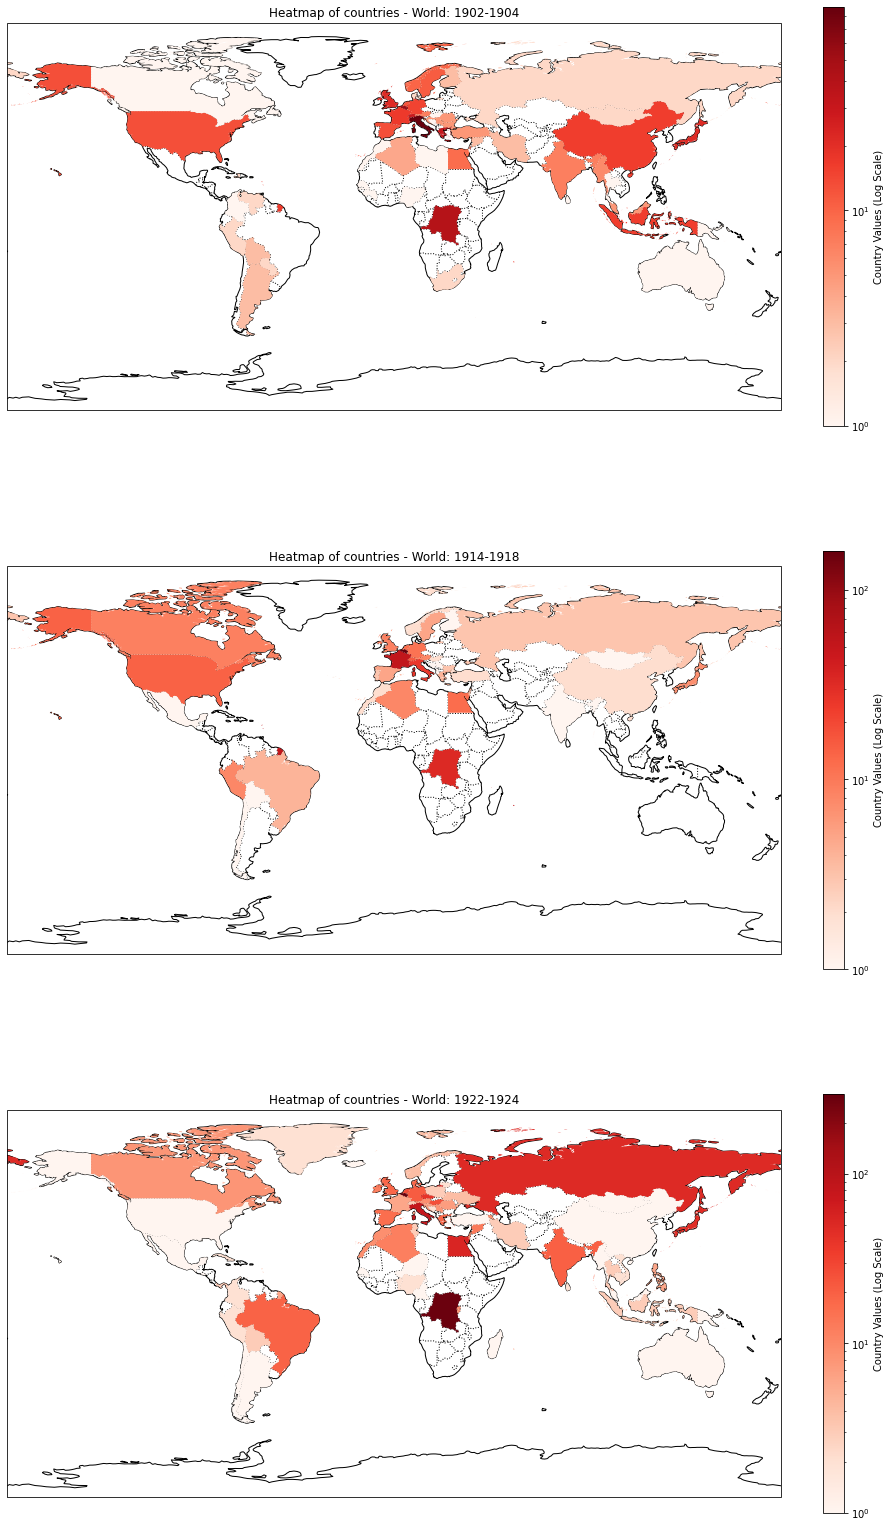

In [11]:
#this cell creates heatmaps (of the world) for the three periods. 

# Assuming you have data for 1922, 1923, and 1924
counter_data_1 = counter_by_period['1902-1904'] 
counter_data_2 = counter_by_period['1914-1918'] 
counter_data_3 = counter_by_period['1922-1924'] 

# Convert to English
# Repeat this for 1922, 1923, and 1924 data
counter_data_english_1 = Counter({name_conversion[k]: v for k, v in counter_data_1.items() if k in name_conversion})
counter_data_english_2 = Counter({name_conversion[k]: v for k, v in counter_data_2.items() if k in name_conversion})
counter_data_english_3 = Counter({name_conversion[k]: v for k, v in counter_data_3.items() if k in name_conversion})


# Create the figure with three subplots
fig, axs = plt.subplots(3, 1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 30))

# The path to your downloaded shapefile
shpfilename = '/Users/thomassmits/Downloads/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp'
reader = Reader(shpfilename)
countries = list(reader.records())  # Store it in a list for re-use

# Function to add heatmaps to axes
def add_heatmap(ax, counter_data, title):
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)

    norm = mcolors.LogNorm(vmin=1, vmax=max(counter_data.values()))
    cmap = plt.cm.Reds

    for country in countries:
        country_name = country.attributes['NAME_LONG']
        if country_name in counter_data:
            ax.add_geometries([country.geometry], ccrs.PlateCarree(),
                              facecolor=cmap(norm(counter_data[country_name])))

    # Add legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = plt.colorbar(sm, ax=ax, orientation="vertical", fraction=0.025, pad=0.05)
    cb.set_label('Country Values (Log Scale)')
    ax.set_title(title)

# Add heatmaps to each subplot
add_heatmap(axs[0], counter_data_english_1, 'Heatmap of countries - World: 1902-1904')
add_heatmap(axs[1], counter_data_english_2, 'Heatmap of countries - World: 1914-1918')
add_heatmap(axs[2], counter_data_english_3, 'Heatmap of countries - World: 1922-1924')

# Adjust the spacing
plt.subplots_adjust(hspace=0)  # Adjust this value as needed

#The code below saves the Figure X of the article
plt.savefig('worldheatmap_periods.png', dpi=300)

plt.show()


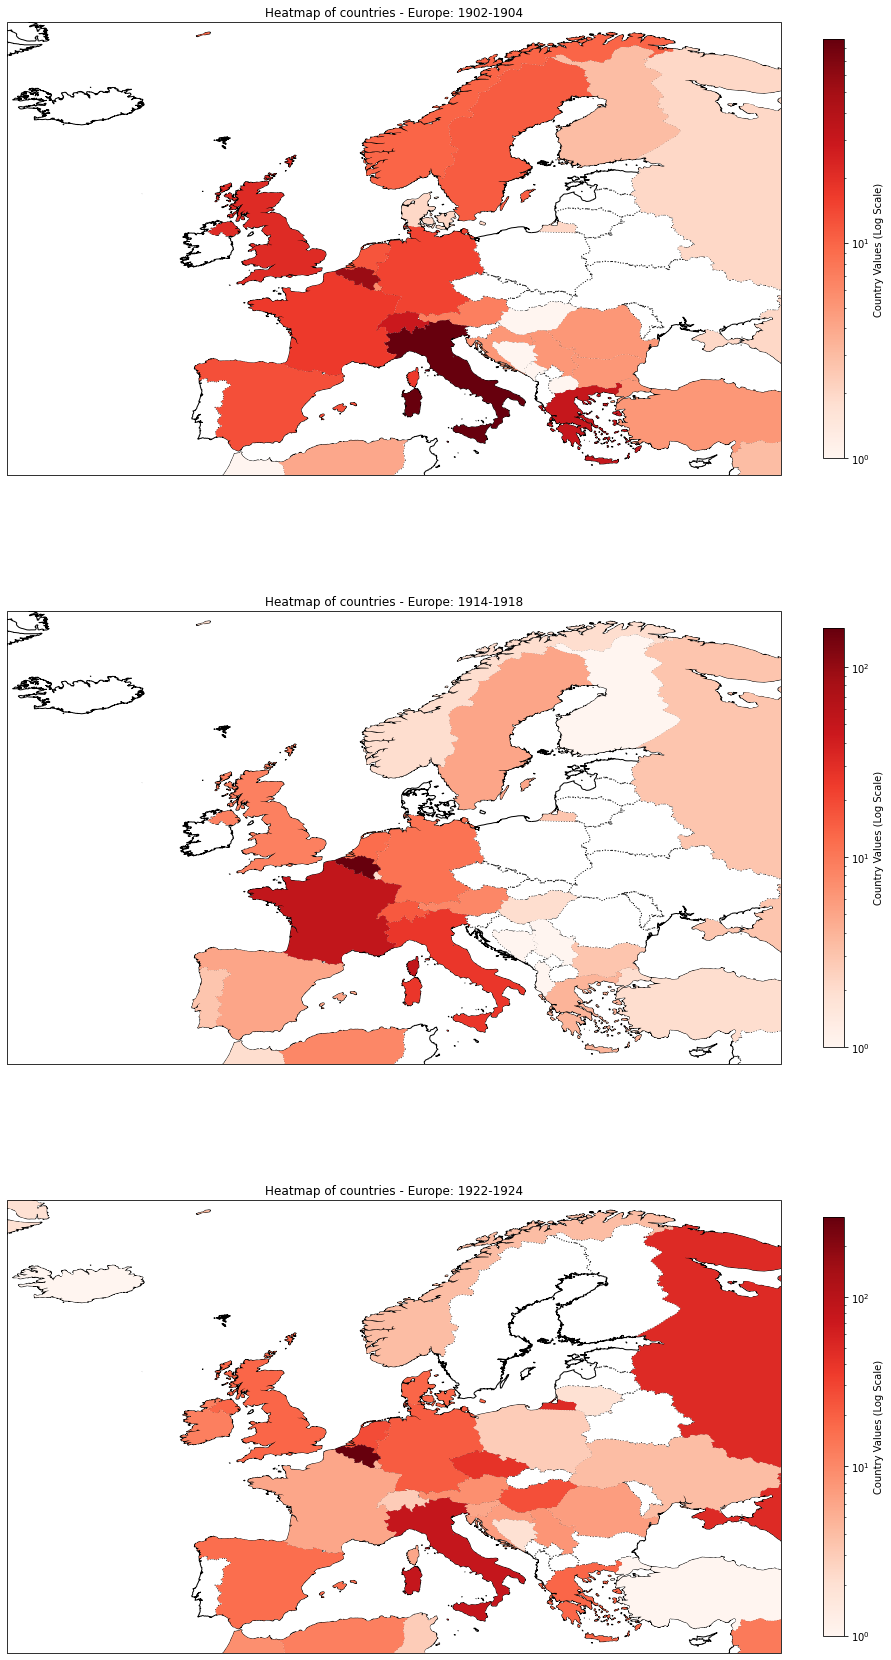

In [12]:
#this cell creates heatmaps (of the world) for the three periods. 

# Assuming you have data for 1922, 1923, and 1924
counter_data_Europe_1 = counter_by_period['1902-1904'] 
counter_data_Europe_2 = counter_by_period['1914-1918'] 
counter_data_Europe_3 = counter_by_period['1922-1924'] 


# Convert to English for each period
# Repeat this for each period's data
counter_data_Europe_1_English = Counter({name_conversion[k]: v for k, v in counter_data_Europe_1.items() if k in name_conversion})
counter_data_Europe_2_English = Counter({name_conversion[k]: v for k, v in counter_data_Europe_2.items() if k in name_conversion})
counter_data_Europe_3_English = Counter({name_conversion[k]: v for k, v in counter_data_Europe_3.items() if k in name_conversion})

# Create the figure with three subplots
fig, axs = plt.subplots(3, 1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 30))

# The path to your downloaded shapefile
shpfilename = '/Users/thomassmits/Downloads/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp'
reader = Reader(shpfilename)
countries = list(reader.records())  # Store it in a list for re-use

# Function to add heatmaps to axes
def add_heatmap(ax, counter_data, title):
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'))

    norm = mcolors.LogNorm(vmin=1, vmax=max(counter_data.values()))
    cmap = plt.cm.Reds

    for country in countries:
        country_name = country.attributes['NAME_LONG']
        if country_name in counter_data:
            ax.add_geometries([country.geometry], ccrs.PlateCarree(),
                              facecolor=cmap(norm(counter_data[country_name])))

    # Add legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = plt.colorbar(sm, ax=ax, orientation="vertical", fraction=0.025, pad=0.05)
    cb.set_label('Country Values (Log Scale)')
    ax.set_title(title)

    # Set the extent for Europe
    ax.set_extent([-25, 40, 34, 72], crs=ccrs.PlateCarree())

# Add heatmaps to each subplot
add_heatmap(axs[0], counter_data_Europe_1_English, 'Heatmap of countries - Europe: 1902-1904')
add_heatmap(axs[1], counter_data_Europe_2_English, 'Heatmap of countries - Europe: 1914-1918')
add_heatmap(axs[2], counter_data_Europe_3_English, 'Heatmap of countries - Europe: 1922-1924')

# Adjust the spacing between plots
plt.subplots_adjust(hspace=0.3)

#The code below saves the Figure X of the article
plt.savefig('europe_heatmap_periods.png', dpi=300)

plt.show()

